## Linear Regression Assignment

### Problem Statement

#### Bike-sharing system
- It is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.
- Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

#### BoomBikes (US bike-sharing provider)

- The company wants to know:
    - Which variables are significant in predicting the demand for shared bikes?
    - How well those variables describe the bike demands?
    
#### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Dataset characteristics

### day.csv have the following fields:
	
#### Unique numeric data
1. instant: record index

#### Time series data
2. dteday : date

#### Categorical Data
3. season : season (1:spring, 2:summer, 3:fall, 4:winter)
4. yr : year (0: 2018, 1:2019)
5. mnth : month ( 1 to 12)
6. holiday : weather day is a holiday or not
7. weekday : day of the week
8. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
9. weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#### Numeric Data
10. temp : temperature in Celsius
11. atemp: feeling temperature in Celsius
12. hum: humidity
13. windspeed: wind speed
14. casual: count of casual users
15. registered: count of registered users
16. cnt: count of total rental bikes including both casual and registered ***Target Variable***
	


### Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # Supress Warnings

In [2]:
biking_data = pd.read_csv("day.csv")
biking_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
biking_data.shape

(730, 16)

In [4]:
biking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
biking_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
biking_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Observation**: There are no missing values

### Step 2: Visualising the Data¶

- We'll visualise our data using matplotlib and seaborn.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

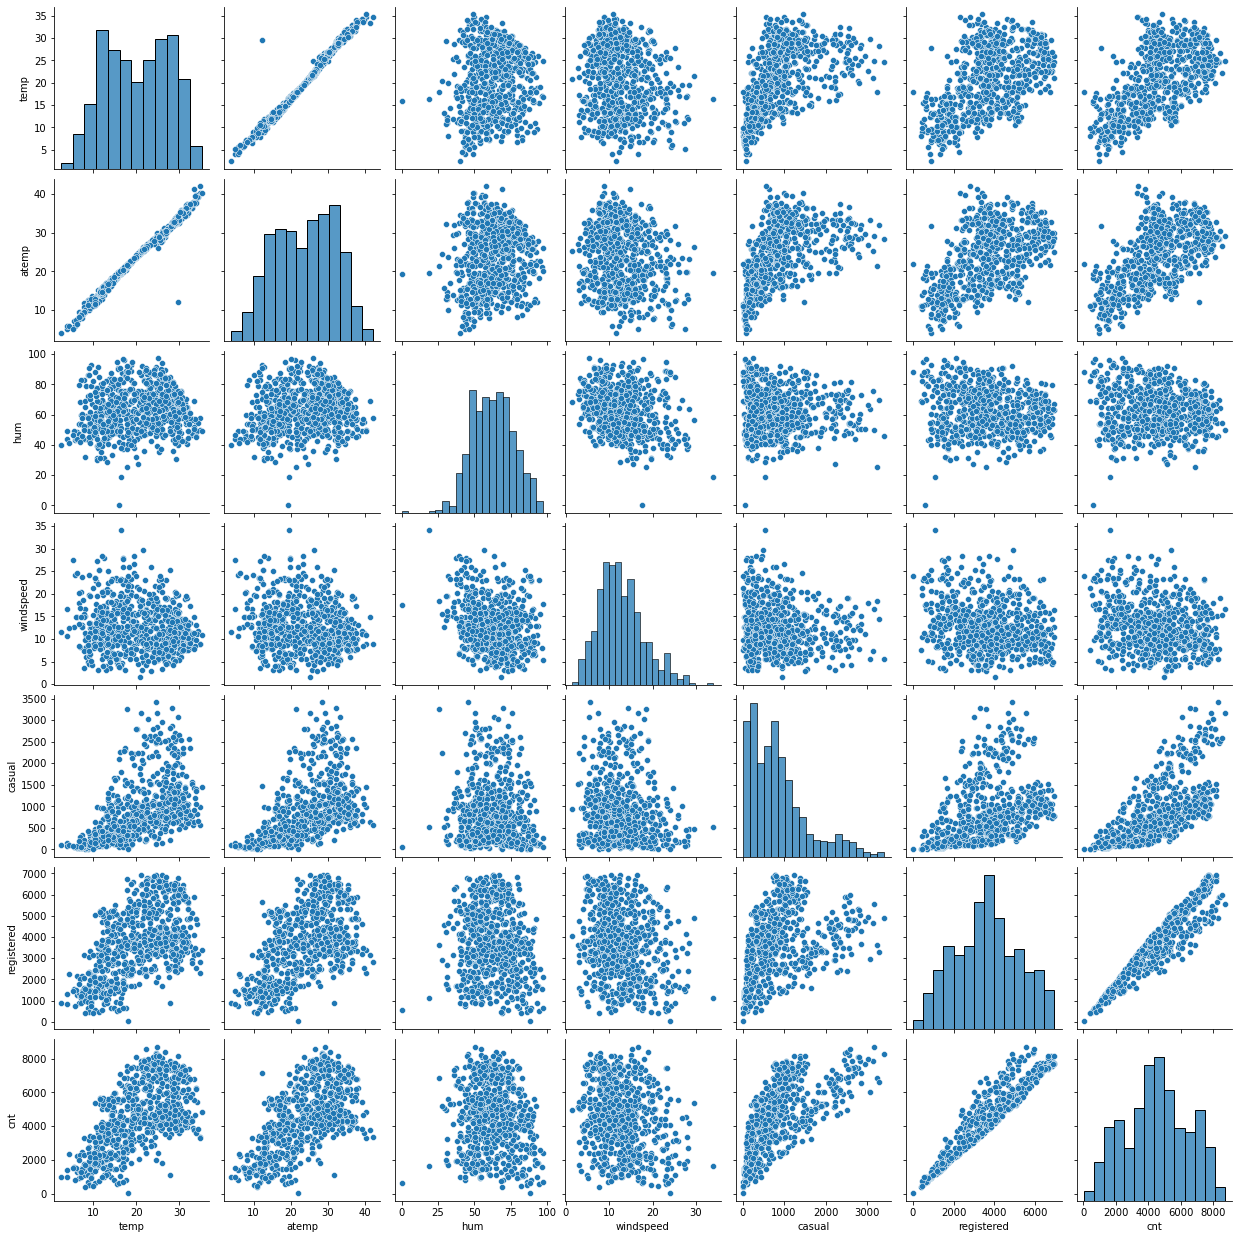

In [8]:
sns.pairplot(biking_data, vars=["temp",'atemp', "hum",'windspeed','casual','registered','cnt'])
plt.show()

**Observation**:
- Target variable(cnt) is correlated with temperature, humidity and windspeed

In [9]:
# Mapping categorical values to better visualizations
biking_data['season']=biking_data.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
biking_data['mnth']=biking_data.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
biking_data['weathersit']=biking_data.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
biking_data['weekday']=biking_data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
biking_data['yr']=biking_data.yr.map({0:'2018',1:'2019'})
biking_data['holiday']=biking_data.holiday.map({0:'no',1:'yes'})
biking_data['workingday']=biking_data.workingday.map({0:'no',1:'yes'})

biking_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,no,Sat,no,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,no,Sun,no,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,no,Mon,yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,no,Tue,yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,no,Wed,yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


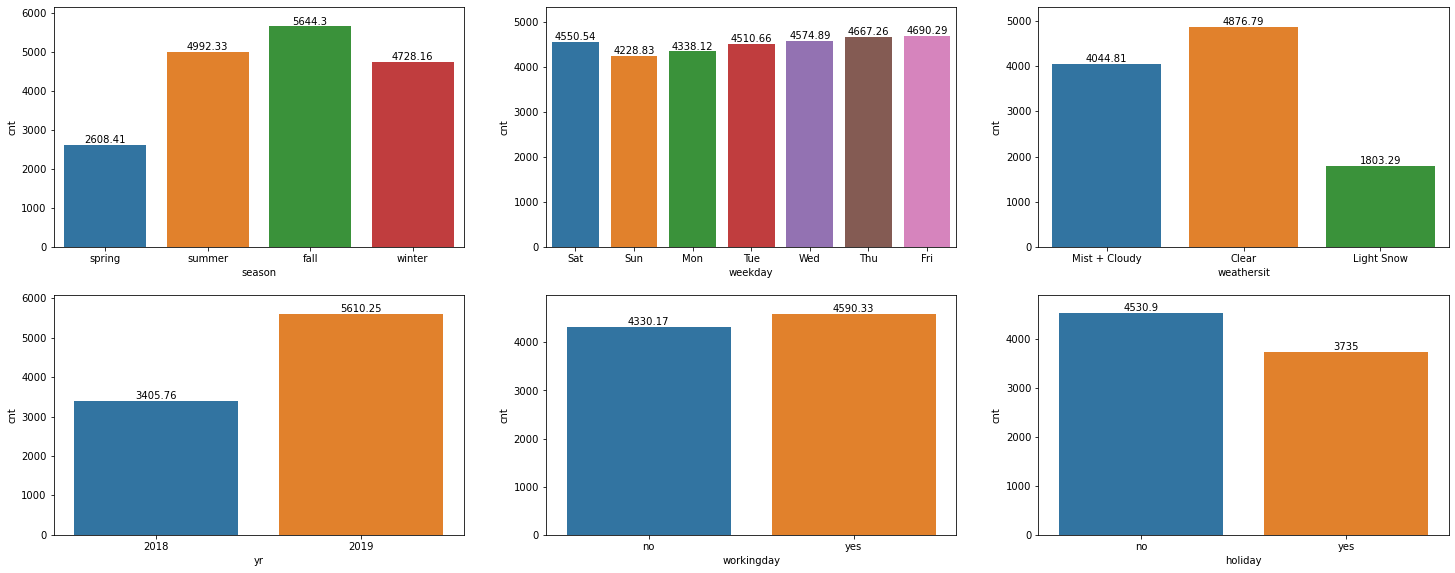

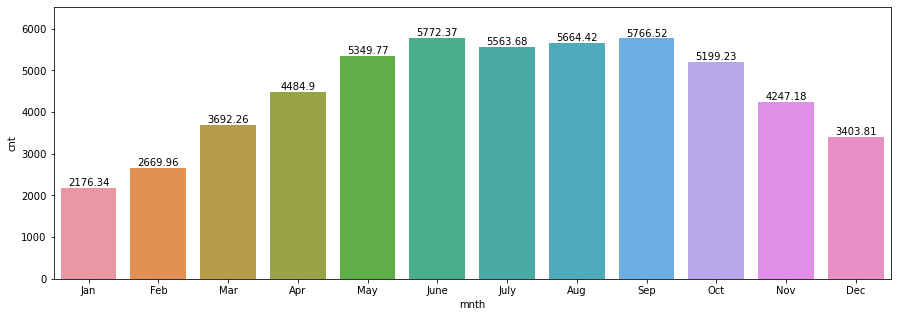

In [10]:
plt.figure(figsize=(25, 15))
plt.subplot(3, 3, 1)
p1 = sns.barplot(x='season', y='cnt', data=biking_data, errwidth=0)
for i in p1.containers:
    p1.bar_label(i,)
plt.subplot(3, 3, 2)
p2 = sns.barplot(x='weekday', y='cnt', data=biking_data, errwidth=0)
for i in p2.containers:
    p2.bar_label(i,)
plt.subplot(3, 3, 3)
p3 = sns.barplot(x='weathersit', y='cnt', data=biking_data, errwidth=0)
for i in p3.containers:
    p3.bar_label(i,)
plt.subplot(3, 3, 4)
p4 = sns.barplot(x='yr', y='cnt', data=biking_data, errwidth=0)
for i in p4.containers:
    p4.bar_label(i,)
plt.subplot(3, 3, 5)
p5 = sns.barplot(x='workingday', y='cnt', data=biking_data, errwidth=0)
for i in p5.containers:
    p5.bar_label(i,)
plt.subplot(3, 3, 6)
p6 = sns.barplot(x='holiday', y='cnt', data=biking_data, errwidth=0)
for i in p6.containers:
    p6.bar_label(i,)
plt.show()

plt.figure(figsize=(15, 5))
p7 = sns.barplot(x='mnth', y='cnt', data=biking_data, errwidth=0)
for i in p7.containers:
    p7.bar_label(i,)
plt.show()


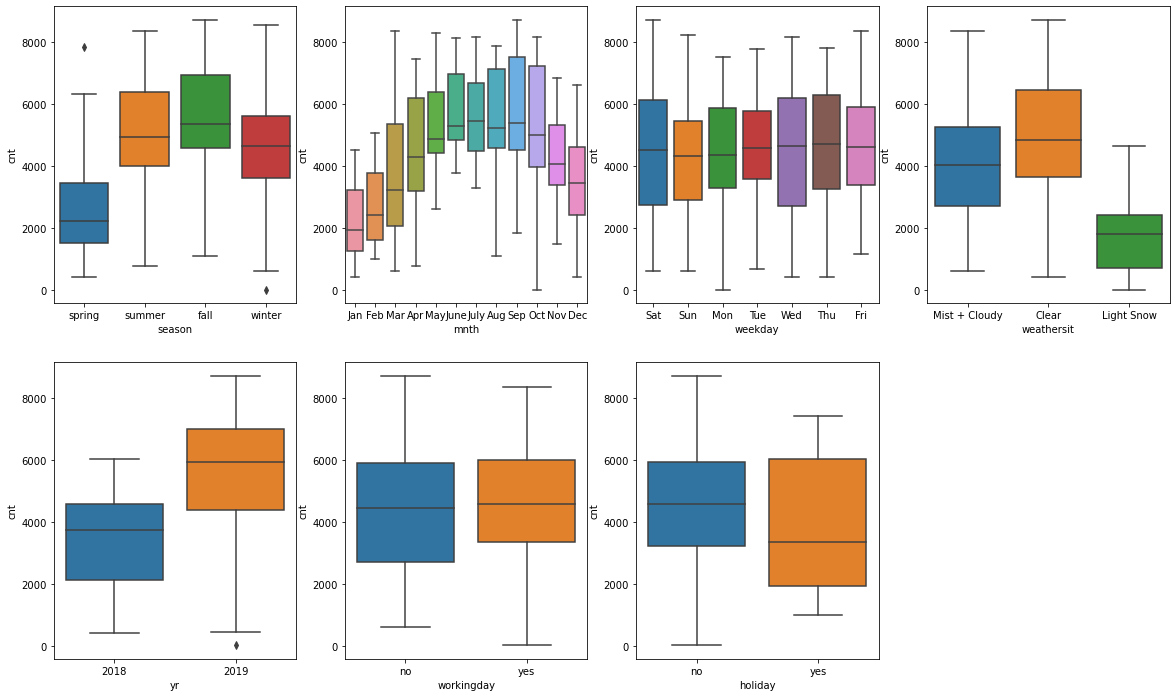

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=biking_data)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=biking_data)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=biking_data)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=biking_data)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=biking_data)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=biking_data)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=biking_data)
plt.show()

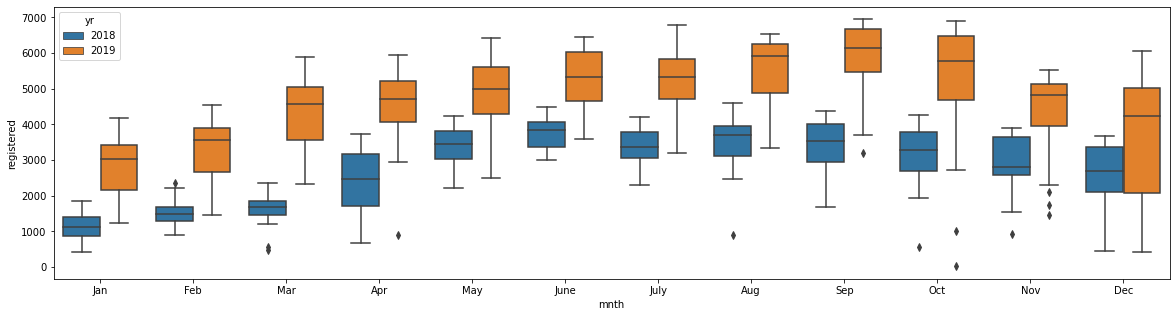

In [12]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = 'mnth', y = 'registered', hue = 'yr', data = biking_data)
plt.show()

**Observations:**
1. Bike renting is high in season summer and fall.
2. Bike renting is high in month May-Oct.
3. Bike renting is high on Sat, Wed, Thu, Fri.
4. Bike renting is high in clear weather.
5. Bike renting is high in year 2019.
6. Bike renting is high in working days and if there is no holiday
7. Registered count is increasing every month


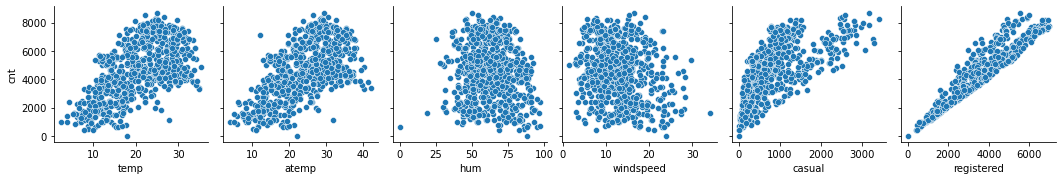

In [13]:
sns.pairplot(biking_data, x_vars=["temp",'atemp', "hum",'windspeed','casual','registered'], y_vars= 'cnt')
plt.show()

In [14]:
#Dropping the un-required variables from the dataset 
#Dropping atemp as it has high corelation with temp and we are using it. 
#instant, dteday, casual, registered are not needed for the analysis and they have no impact on cnt
#cnt = casual + registered therefore they are dropped

biking_data = biking_data.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)

### Step 3: Data Preparation
 - In order to fit a regression line, we would need numerical values and not string.
    - yr {0:'2018',1:'2019'}
    - holiday {0:'no',1:'yes'}
    - workingday {0:'no',1:'yes'}
 - Other categorical variable we will convert to dummy variables
    - season {1: 'spring', 2: 'summer',3:'fall', 4:'winter' }
    - mnth {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
    - weathersit {1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'}
    - weekday {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}

In [15]:
# converting the string value to numerical and dummy variables

biking_data['yr']=biking_data.yr.map({'2018':0,'2019':1})
biking_data['holiday']=biking_data.holiday.map({'no':0,'yes':1})
biking_data['workingday']=biking_data.workingday.map({'no':0,'yes':1})

# Getting the dummy variable for the below columns
month = pd.get_dummies(biking_data.mnth, drop_first=True)
weekday = pd.get_dummies(biking_data.weekday, drop_first=True)
weathersit = pd.get_dummies(biking_data.weathersit, drop_first=True)
season = pd.get_dummies(biking_data.season, drop_first=True)
biking_data = pd.concat([biking_data,month, weekday, weathersit, season], axis=1)

# Dropping the columns as dummy variables are there for them
biking_data.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [16]:
biking_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


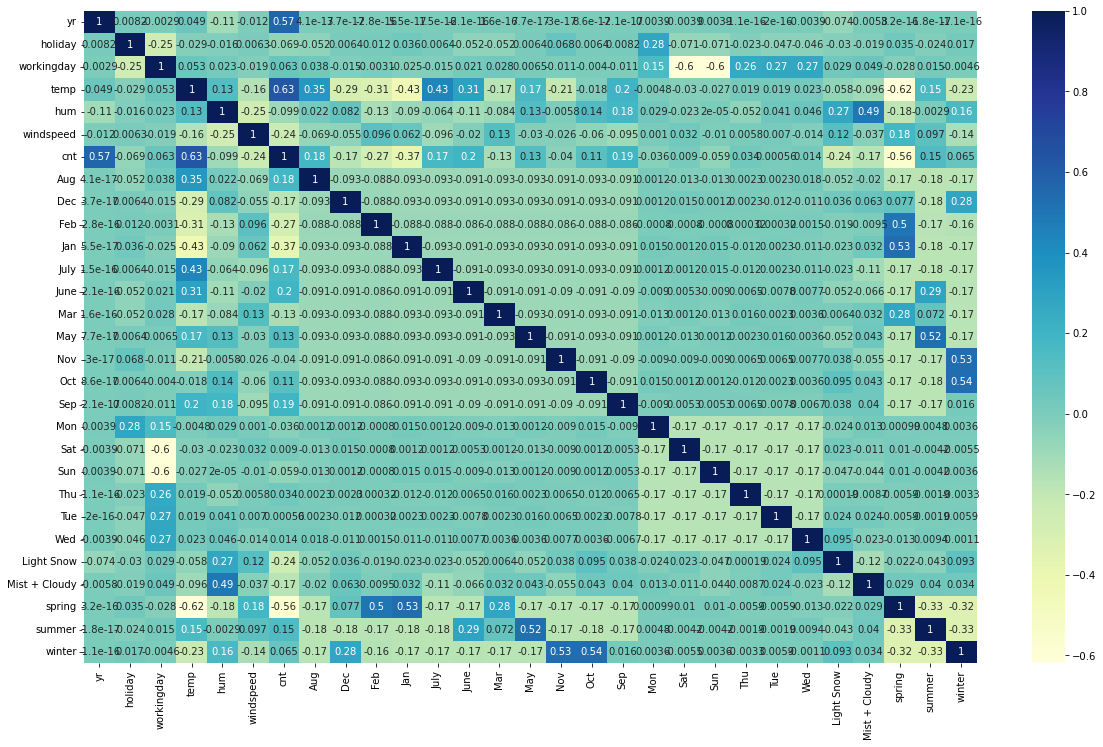

In [17]:
plt.figure(figsize=(20, 12))
sns.heatmap(biking_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Step 4: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split and after that rescaling 

In [18]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
print (biking_data.shape)

np.random.seed(0)
biking_data_train, biking_data_test = train_test_split(biking_data, train_size = 0.7, test_size = 0.3, random_state = 100)
print (biking_data_train.shape)
print (biking_data_test.shape)

(730, 29)
(510, 29)
(219, 29)


**Rescaling the Features**

Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
biking_data_train[scaler_var] = scaler.fit_transform(biking_data_train[scaler_var])

In [21]:
biking_data_train.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,0,0,0,0,0,0,1,0,1,0
580,1,0,0,0.914852,0.632030,0.462538,0.782559,1,0,0,...,1,0,0,0,0,0,0,0,0,0
500,1,0,1,0.719639,0.719193,0.172431,0.851588,0,0,0,...,0,0,0,0,1,0,0,0,1,0
479,1,0,1,0.520271,0.440962,0.164434,0.710308,0,0,0,...,0,0,0,0,1,0,0,0,1,0
472,1,0,1,0.503656,0.586518,0.270032,0.499885,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [22]:
biking_data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


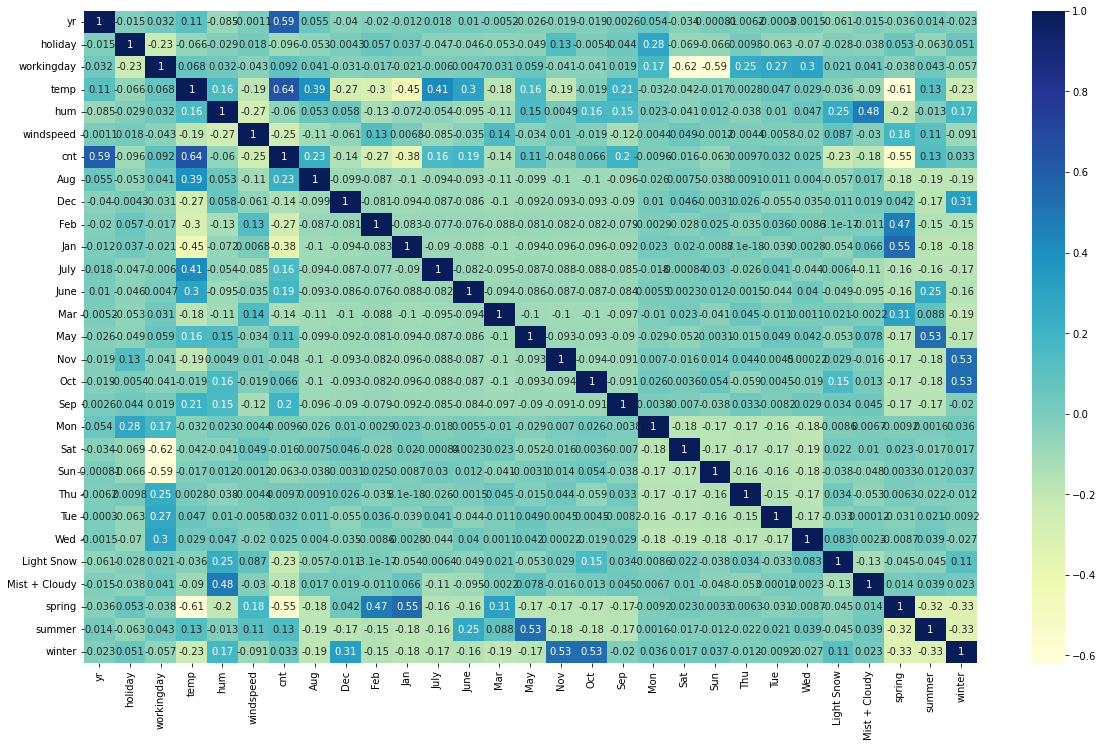

In [23]:
plt.figure(figsize=(20, 12))
sns.heatmap(biking_data_train.corr(), cmap="YlGnBu", annot=True)
plt.show()

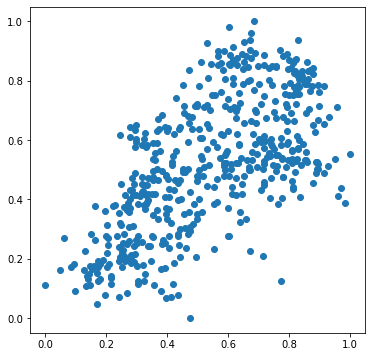

In [24]:
# It is clear that cnt is highly corelated with temp

#checking for correlation between count and temp using a pairplot
plt.figure(figsize=[6,6])
plt.scatter(biking_data_train.temp, biking_data_train.cnt)
plt.show()

## Dividing into X and Y sets for the model building

In [25]:
y_train = biking_data_train.pop('cnt')
X_train = biking_data_train

In [26]:
y_train.head(5)

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [27]:
X_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
653,1,0,1,0.509887,0.575354,0.300794,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


### Step 5: Building a linear model

we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE(Recursive feature elimination) (which is a utility from sklearn)

In [28]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [29]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 9),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', False, 6),
 ('Thu', False, 11),
 ('Tue', False, 8),
 ('Wed', False, 12),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [31]:
# Variables selected through RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [32]:
# Variables Rejected through RFE
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

In [33]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [34]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [35]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [36]:
lm.params

const            0.251042
yr               0.230502
holiday         -0.058529
workingday       0.043521
temp             0.509836
hum             -0.154716
windspeed       -0.185956
Jan             -0.034326
July            -0.053193
Sep              0.081186
Sat              0.053721
Light Snow      -0.248777
Mist + Cloudy   -0.057824
spring          -0.050806
summer           0.049660
winter           0.094426
dtype: float64

In [37]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.31e-191
Time:                        15:31:32   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949

The low (<0.05) or almost zero p-value of all the selected variables enables us to reject the null hypothesis.

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

### Checking VIF

- The VIF should be generally <5 and we have achieved that condition with all the variables.


In [38]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.48
13,summer,2.84
11,Mist + Cloudy,2.29
0,yr,2.09
9,Sat,1.98


In [39]:
# Dropping hum as it has high VIF
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          7.33e-189
Time:                        15:31:33   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1737      0.031      5.525

In [40]:
# Dropping workingday as it has high p Value
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.21e-186
Time:                        15:31:33   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2121      0.030      6.986

In [41]:
# Dropping Sat as it has high p Value
X_train_rfe = X_train_rfe.drop(['Sat'], axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          3.97e-187
Time:                        15:31:33   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2155      0.030      7.096

In [42]:
# Dropping Jan as it has high p Value
X_train_rfe = X_train_rfe.drop(['Jan'], axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.40e-187
Time:                        15:31:33   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1996      0.030      6.758

In [43]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

         Features   VIF
2            temp  5.09
3       windspeed  4.60
9          summer  2.21
8          spring  2.08
0              yr  2.07
10         winter  1.79
4            July  1.58
7   Mist + Cloudy  1.55
5             Sep  1.34
6      Light Snow  1.08
1         holiday  1.04


In [44]:
# Dropping temp is resulting the decrease in R-sqaured value(.75)
# Dropping windspeed as it has high VIF Value

X_train_rfe = X_train_rfe.drop(['windspeed'], axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.80e-181
Time:                        15:31:33   Log-Likelihood:                 481.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1503      0.029      5.134

In [45]:
# Dropping July as it has high VIF Value
X_train_rfe = X_train_rfe.drop(['July'], axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          6.89e-181
Time:                        15:31:33   Log-Likelihood:                 478.19
No. Observations:                 510   AIC:                            -936.4
Df Residuals:                     500   BIC:                            -894.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1415      0.029      4.833

In [62]:
X_train_rfed = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_rfed
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

        Features   VIF
2           temp  2.89
0             yr  2.06
7         summer  1.62
5  Mist + Cloudy  1.54
8         winter  1.44
6         spring  1.33
3            Sep  1.23
4     Light Snow  1.07
1        holiday  1.04


In [63]:
lm.params

const            0.141513
yr               0.233091
holiday         -0.099654
temp             0.490047
Sep              0.095351
Light Snow      -0.300765
Mist + Cloudy   -0.078390
spring          -0.064466
summer           0.051232
winter           0.097123
dtype: float64

### Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [64]:
y_train_cnt = lm.predict(X_train_rfe)
res=(y_train - y_train_cnt)

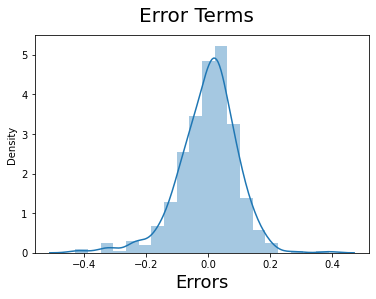

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

**The residuals are following the normally distributed with a mean 0. All good!**

### Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

### Applying the scaling on the test sets

In [50]:
scaler_var = ['hum', 'windspeed', 'temp', 'cnt']
biking_data_test[scaler_var] = scaler.transform(biking_data_test[scaler_var])

### Dividing into X_test and y_test

In [51]:
y_test = biking_data_test.pop('cnt')
X_test = biking_data_test

In [52]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfed.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [53]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [74]:
#r2 score of the test and training set
from sklearn.metrics import r2_score

y_train_pred = lm.predict(X_train_rfe)
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the train set is 0.8216889627076686
r2 score on the test set is 0.8088172921479285


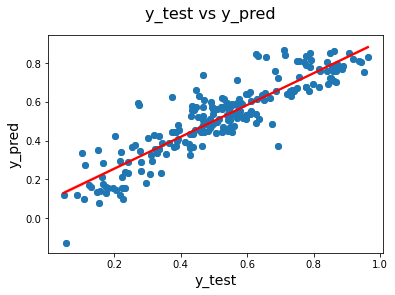

In [69]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

In [73]:
#finding out the mean squared error 
from sklearn.metrics import mean_squared_error

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.00897669885139016
Mean squared error of the test set is 0.009080377213793659


Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets

### Summary:

- The R-squared value of the train set is **80.88** whereas the test set has a value of **82.16** which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model.
- Our developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that the variance is accurately predicted on the test set. The p-values and VIF were used to select the significant variables.
- We can conclude that the bike demands for the BoomBikes is company is dependent on the **temperature** and whether it is a **workingday** or **not**.
- Additionally more sales was on the summer and fall season. We had observed that the months of May-October had higher use of rentals. In terms of days the maximum focus was on days like Wed, Thurs and Sat and Fri.
- These interpretations help us derive meaningful insights in the bike rental market and the behaviour of the people. One of the recommendations based on this model are that there should be **aggressive marketing in the summer and spring season to drive up rentals**. Since the summer months also show low rental levels.